<a href="https://colab.research.google.com/github/ysamokhotov/yandex-praktikum-projects/blob/main/%D0%A0%D0%B0%D0%B7%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0%20%D1%81%D1%82%D1%80%D0%B0%D1%82%D0%B5%D0%B3%D0%B8%D0%B8%20%D0%B2%D0%B7%D0%B0%D0%B8%D0%BC%D0%BE%D0%B4%D0%B5%D0%B9%D1%81%D1%82%D0%B2%D0%B8%D1%8F%20%D1%81%20%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8F%D0%BC%D0%B8%20%D0%B4%D0%BB%D1%8F%20%D1%81%D0%B5%D1%82%D0%B8%20%D1%84%D0%B8%D1%82%D0%BD%D0%B5%D1%81-%D0%BA%D0%BB%D1%83%D0%B1%D0%BE%D0%B2/%D0%A0%D0%B0%D0%B7%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%81%D1%82%D1%80%D0%B0%D1%82%D0%B5%D0%B3%D0%B8%D0%B8_%D0%B2%D0%B7%D0%B0%D0%B8%D0%BC%D0%BE%D0%B4%D0%B5%D0%B9%D1%81%D1%82%D0%B2%D0%B8%D1%8F_%D1%81_%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8F%D0%BC%D0%B8_%D0%B4%D0%BB%D1%8F_%D1%81%D0%B5%D1%82%D0%B8_%D1%84%D0%B8%D1%82%D0%BD%D0%B5%D1%81_%D0%BA%D0%BB%D1%83%D0%B1%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## План работы:   
1) [Импорт библиотек](#1)   
2) [EDA](#2)

* [Посмотрим на датасет, проведем предобработку, посмотрим на средние с стандартное отклонение](#2.1)
* [Посмотрим на среднее значение признаков целевой переменной](#2.2)
* [Построим столбчатые графики для признаков по каждому значению целевой переменной](#2.3)
* [Построим матрицу корреляций](#2.4)

3) [Модель прогнозирования оттока клиентов](#3)

* [Логистическая регрессия](#3.1)
* [Случайный лес](#3.2)

4) [Кластеризация клиентов](#4) 

* [Дендрограмма и выявление оптимального числа кластеров](#4.1)
* [Прогноз кластеров на основании K-Means](#4.2)
* [Анализ получившихся кластеров](#4.3)

5) [Общие выводы и рекомендации](#5)   

# Импорт библиотек <a id='1'></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
try:
    path = 'gdrive/My Drive/Colab Notebooks/ЯП/Проекты/df/' 
    df = pd.read_csv(path + 'gym_churn.csv')
except:
    df = pd.read_csv('/datasets/gym_churn.csv')

# EDA <a id='2'></a>

## Посмотрим на датасет, проведем предобработку, посмотрим на средние и стандартное отклонение <a id='2.1'></a>

In [ ]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df['month_to_end_contract'] = df['month_to_end_contract'].astype(int)

In [ ]:
df.isna().mean()

gender                               0.0
near_location                        0.0
partner                              0.0
promo_friends                        0.0
phone                                0.0
contract_period                      0.0
group_visits                         0.0
age                                  0.0
avg_additional_charges_total         0.0
month_to_end_contract                0.0
lifetime                             0.0
avg_class_frequency_total            0.0
avg_class_frequency_current_month    0.0
churn                                0.0
dtype: float64

*Пропусков в датасете нет.*

In [ ]:
df.duplicated().sum()

0

*Дубликатов нет.*

In [ ]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


*Значительных аномалий в данных не наблюдается.*

**Вывод:** *Аномальных значений в детесете нет, нет дубликатов и пропусков. Столбец month_to_end_contract приведен к целочисленным значениям, заголовки приведены к нижнему регистру.    
В среднем больше в клуб ходит мужчин, большая часть живет рядом, около половины пришли по партнерской программе, 30% пришли по акции "приведи друга", почти все оставили номер телефона, в среднем абонементы берут на срок от 3 до 6 мес., на групповые занятия ходят около 40%, средний возраст клиента - 29 лет, средний уровень доп. трат в клубе - 146 рублей, в среднем продолжительность действия текущего абонемента составляет около 4 мес., в среднем с первого обращения прошло 3.7 мес., средняя частота посещений с момента обращения - 2 раза, на прошлой неделе - чуть ниже. Средний отток - 26,5%.*

## Посмотрим на среднее значение признаков целевой переменной <a id='2.2'></a>

In [ ]:
df.groupby('churn').agg('mean').T.sort_values(0, ascending=False)

churn,0,1
avg_additional_charges_total,158.445715,115.082899
age,29.976523,26.989632
contract_period,5.747193,1.728558
month_to_end_contract,5.283089,1.662582
lifetime,4.711807,0.990575
avg_class_frequency_current_month,2.027882,1.044546
avg_class_frequency_total,2.024876,1.474995
phone,0.903709,0.902922
near_location,0.873086,0.768143
partner,0.534195,0.355325


**Вывод:** *В среднем уходят более молодые клиенты, с более коротким абонементом и лайфтаймом. Они в 1.5-2 раза реже посещают клуб на короткой и длинной дистанции соот-но. В отток попадают те, кто дальше живут, кто не пришел по партнерской программе и те, кто не пришел по акции "приведи друга". Также они реже посещают групповые занятия.*

## Построим столбчатые графики для признаков по каждому значению целевой переменной <a id='2.3'></a>

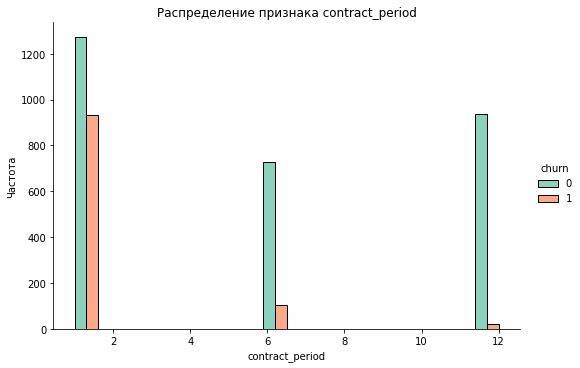

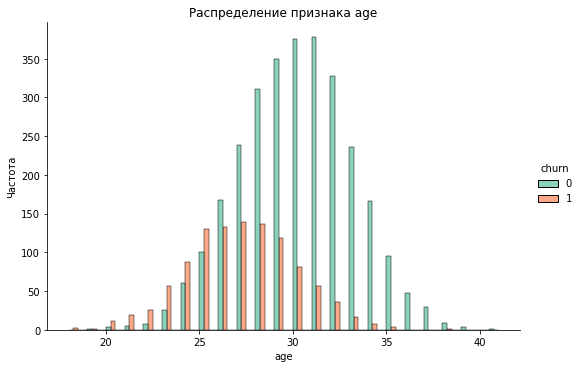

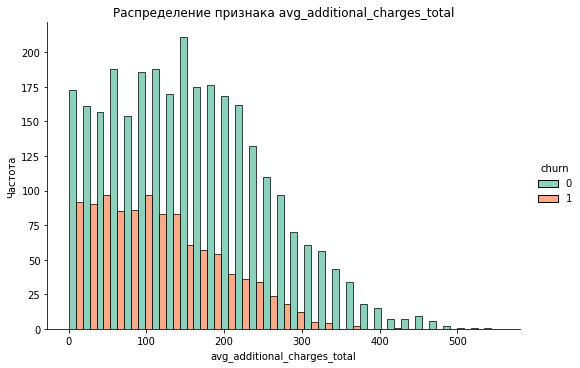

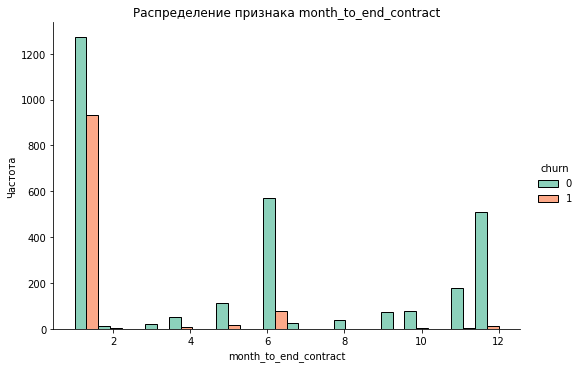

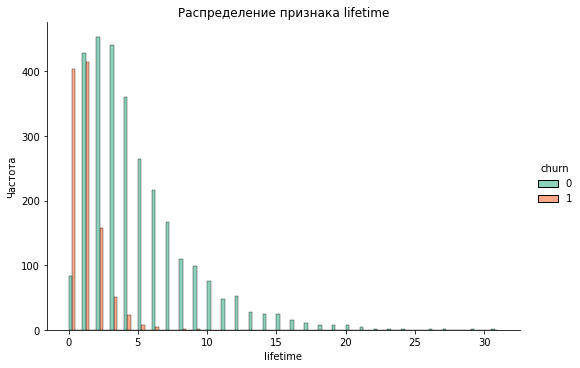

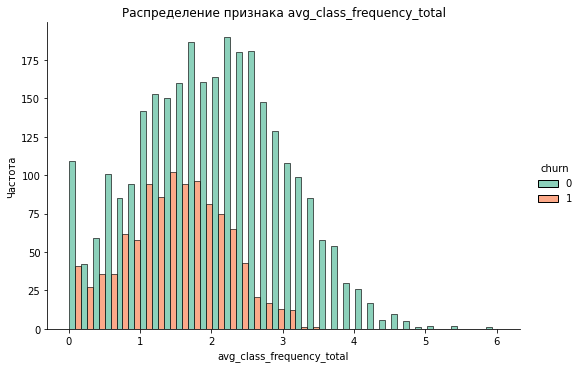

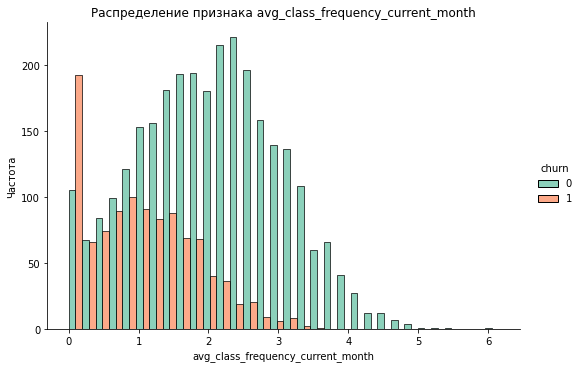

In [ ]:
for column in df.columns[~df.isin([0,1]).all()]:
    sns.displot(data=df, x=column, hue='churn', palette='Set2',
                multiple='dodge', kind='hist', height=5, aspect=1.5)
    plt.title(f'Распределение признака {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Частота')
    plt.show()

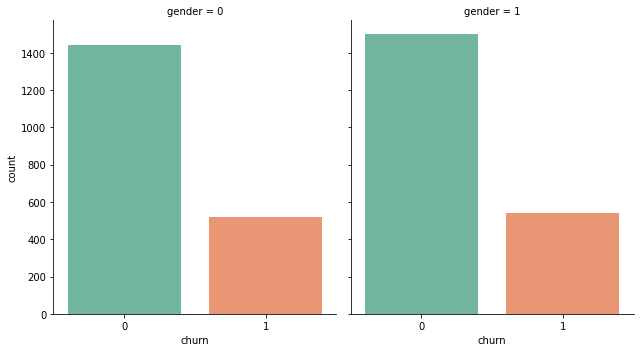

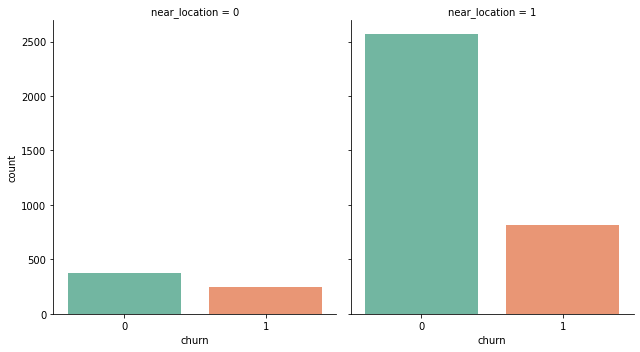

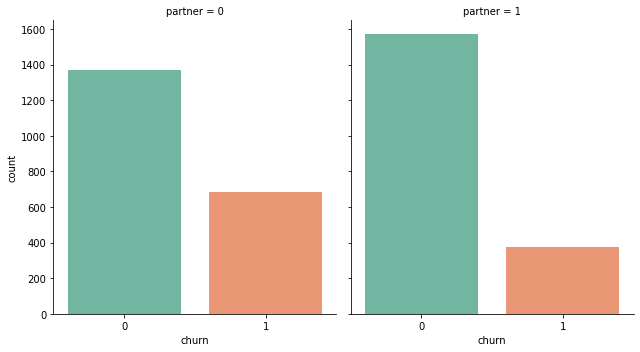

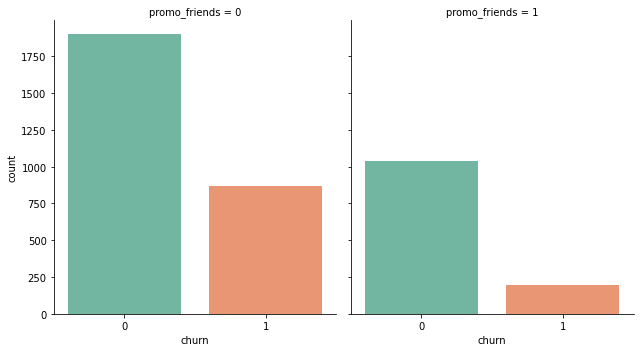

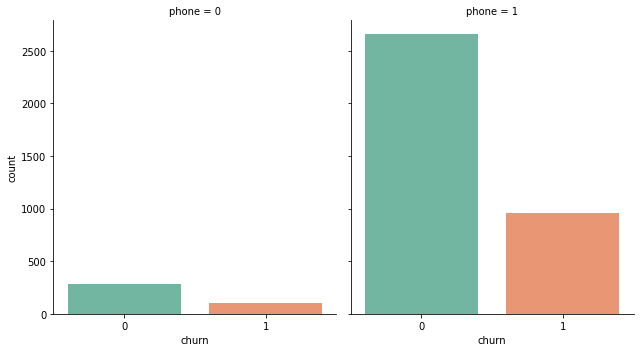

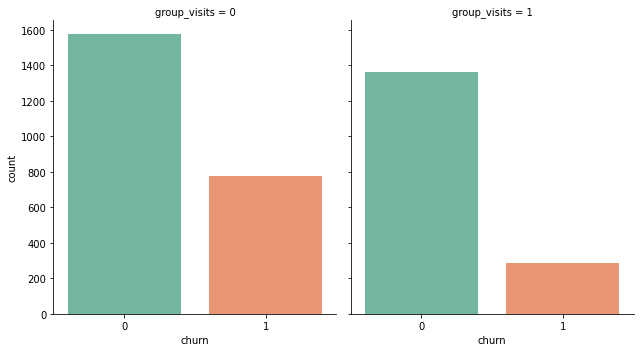

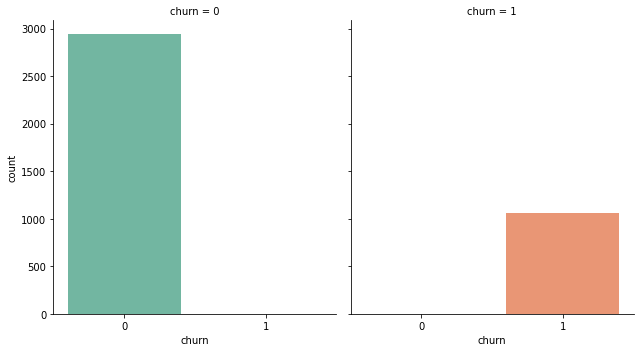

In [ ]:
for column in df.columns[df.isin([0,1]).all()]:

    sns.catplot(
    data=df, x='churn', col=column,
    kind='count', height=5, aspect=.9, palette='Set2')

## Построим матрицу корреляций <a id='2.4'></a>

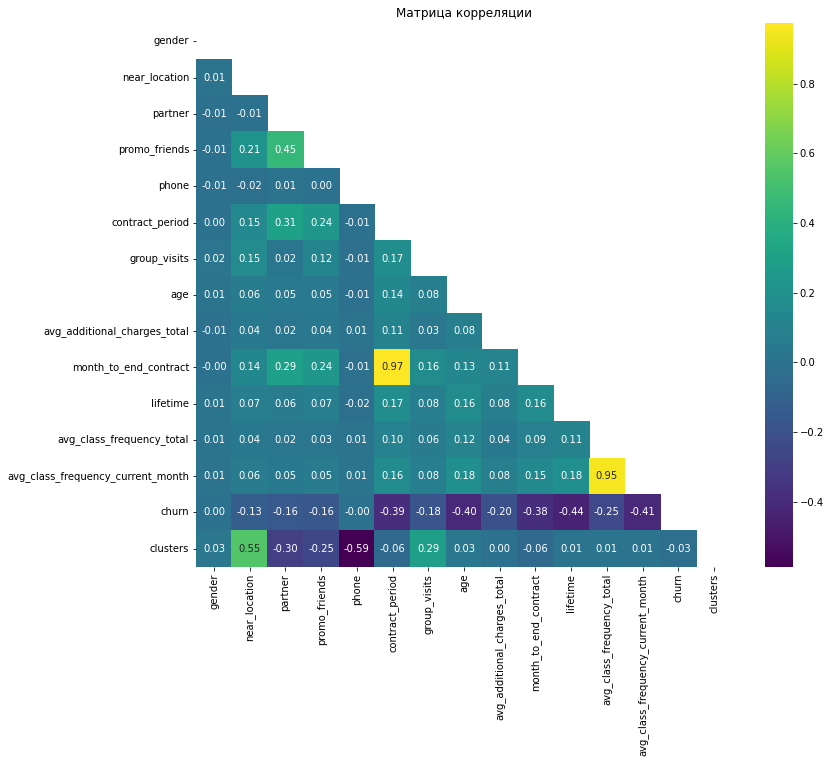

In [ ]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), annot=True, mask=mask, fmt = '0.2f', cmap='viridis')
heatmap.set_title('Матрица корреляции')
plt.show()

**Выводы:** *Больше всего с оттоком коррелируют: срок абонемента (большая часть продается на срок до 3 месяцев, здесь наивысший процент оттока), возраст (среди тех, кто уходит, больше молодых), срок до окончания действующего абонемента (опять же, выше отток у тех, у кого сроко заканчивается абонемент), лайфтайм (больше отток среди новых клиентов) и частота посещений в последний месяц.   
Есть мультиколлинеарность: сильно коррелируют срок абонемента и кол-во месяцев до окончания действующего абенемента. Также сильно коррелируют кол-во посещений всего и за последний месяц.*   
*Для борьбы с мультиколлинеарностью уменьшим размерность, удалив столбцы с оставшимся кол-вом месяцев абонемента и средней посещаемостью за прошлый месяц.*

In [ ]:
df_for_models = df.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis=1).copy()

# Модель прогнозирования оттока пользователей <a id='3'></a>

## Логистическая регрессия <a id='3.1'></a>

In [ ]:
# определеим признаки и целевую переменную
X = df_for_models.drop('churn', axis=1)
y = df_for_models['churn']

In [ ]:
# разобьем датасет на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y)

**Без стадартизирования.**

In [ ]:
# обучим модель
lr_model = LogisticRegression(solver='liblinear',random_state = 0)
lr_model.fit(X_train, y_train)

# сделаем предикт
predictions = lr_model.predict(X_test)

# проверим метрики модели на валидационной выборке
acc = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print('Accuracy: {:.2f}'.format(acc))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))

Accuracy: 0.90
Precision: 0.83
Recall: 0.80


*Модель показывает хорошую точность, precision и recall также показали высокие результаты. При class_weight='balanced' понижаются accuracy и precision, повышается recall.*

**Стандартизируем данные.**

In [ ]:
# стандартизируем данные методом StandartScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# обучим модель
lr_model = LogisticRegression(solver='liblinear',random_state = 0)
lr_model.fit(X_train_st, y_train)

# сделаем предикт
predictions = lr_model.predict(X_test_st)

# проверим метрики модели на валидационной выборке
acc = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print('Accuracy: {:.2f}'.format(acc))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))

Accuracy: 0.91
Precision: 0.83
Recall: 0.83


*Модель показывает чуть лучшие результаты по accuracy и recall.*

## Случайный лес <a id='3.2'></a>

In [ ]:
# обучим модель
rf_model = RandomForestClassifier(random_state = 0)
rf_model.fit(X_train, y_train)

# сделаем предикт
rf_predictions = rf_model.predict(X_test)

# проверим метрики модели на валидационной выборке
acc = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print('Accuracy: {:.2f}'.format(acc))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))

Accuracy: 0.91
Precision: 0.83
Recall: 0.83


*Модель показывает такие же результаты, как логистическая регрессия на стандартизированных данных.*

**Выводы:** *Модели случайного леса и логистической регрессии показали себя одинаково хорошо.*

# Кластеризация пользователей <a id='4'></a>

## Дендрограмма и выявление оптимального числа кластеров <a id='4.1'></a>

In [ ]:
# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

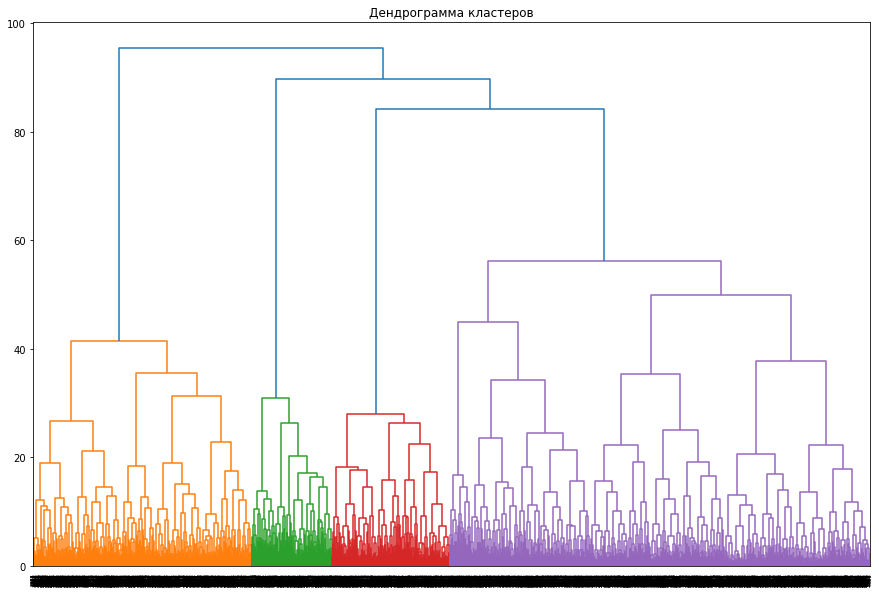

In [ ]:
# построим матрицу расстояний и нарисуем дедндрограмму
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма кластеров')
plt.show()

*Предложенное оптимальное число кластеров 4-5.*

## Прогноз кластеров на основании K-Means <a id='4.2'></a>

In [ ]:
# задаём число кластеров равное 5 и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=5, random_state=0)

In [ ]:
# применяем алгоритм к данным и формируем вектор кластеров
labels = km.fit_predict(X_sc)

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int32)

In [ ]:
# добавим в отдельный столбец
df['clusters'] = labels

## Анализ получившихся кластеров <a id='4.3'></a>

In [ ]:
# смотрим на средние признаков для каждого класса
pd.pivot_table(data=df, columns=df['clusters'], aggfunc='mean')

clusters,0,1,2,3,4
age,28.721925,29.543810,28.770318,29.536165,29.297927
avg_additional_charges_total,137.540009,155.861428,143.383993,148.088897,144.208179
avg_class_frequency_current_month,1.606619,1.933736,1.645965,1.845911,1.723967
avg_class_frequency_total,1.770413,1.978963,1.800647,1.941342,1.854211
churn,0.399287,0.120952,0.381625,0.200918,0.266839
contract_period,3.032086,7.660952,2.819788,4.528129,4.777202
gender,0.499109,0.488571,0.505300,0.544202,0.523316
group_visits,0.235294,0.458095,0.000000,1.000000,0.427461
lifetime,3.060606,4.380952,3.343640,3.761194,3.940415
month_to_end_contract,2.853832,6.988571,2.650177,4.165327,4.466321


**Выводы:**   
*1) Наименьший отток в 1 кластере, наибольший отток в кластерах 0 и 2 (почти 40%).*   
*2) Кластеры 0 и 2 также выделяются по сроку абонемента - самые короткие, в среднем около 3 месяцев.*   
*3) Кластеры 0 и 2 меньше ходят на групповые занятия и, как правило, это новые клиенты.*   
*4) В кластере с наименьшим оттоком наибольшая доля пользователей, пришедших по промо "приведи друга" или по партнерской программе, также они больше всех тратят на доп покупки.*   
*5) Кластер 3 - любители групповых занятий.*   
*6) Дальше всех живут кластер 0.*   
*7) Кластер 4 выделяется относительно высокой долей, пришедших по промо "приведи друга".*

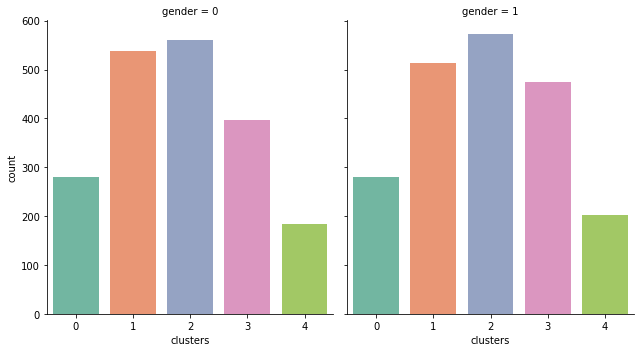

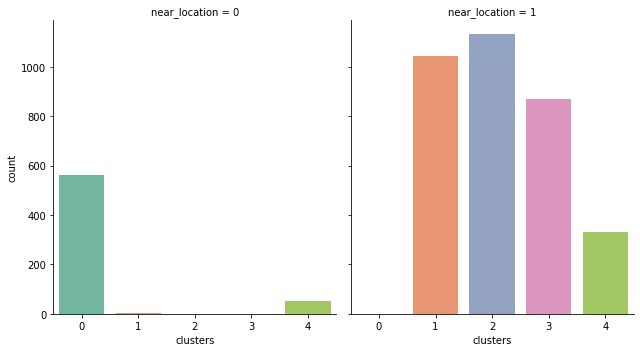

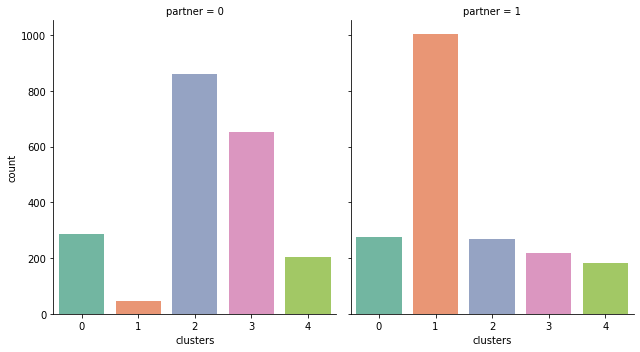

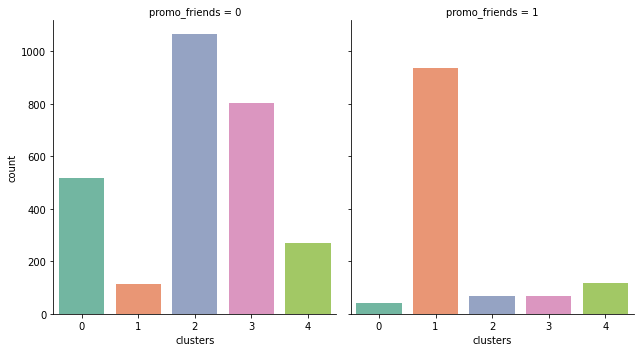

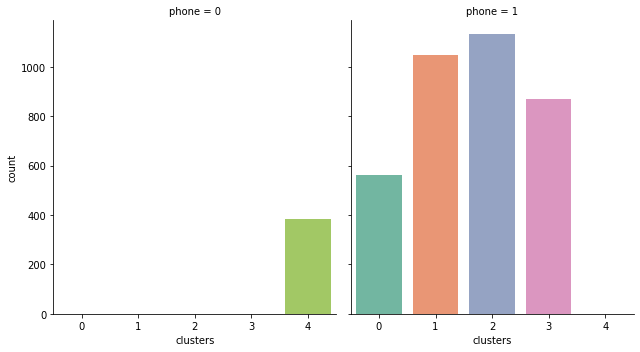

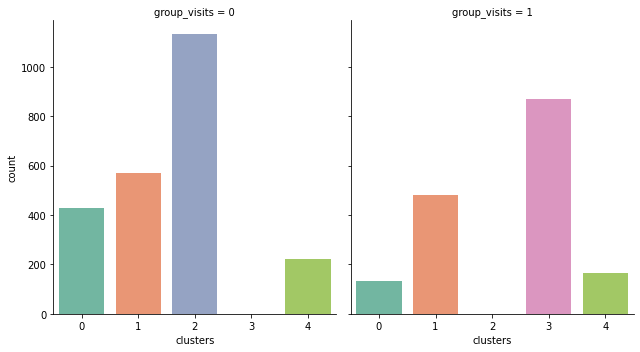

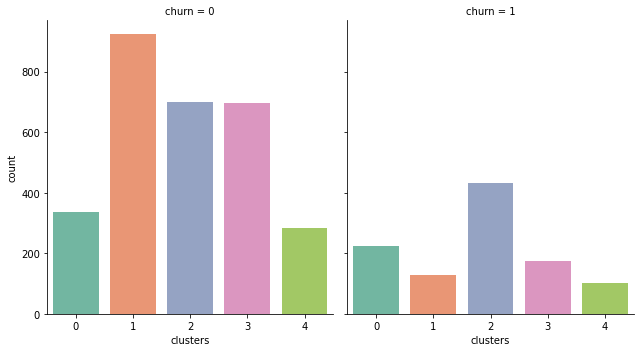

In [ ]:
# смотрим распределение для бинарных признаков
for column in df.columns[df.isin([0,1]).all()]:
    sns.catplot(
    data=df, x='clusters', col=column,
    kind='count', height=5, aspect=.9, palette='Set2')

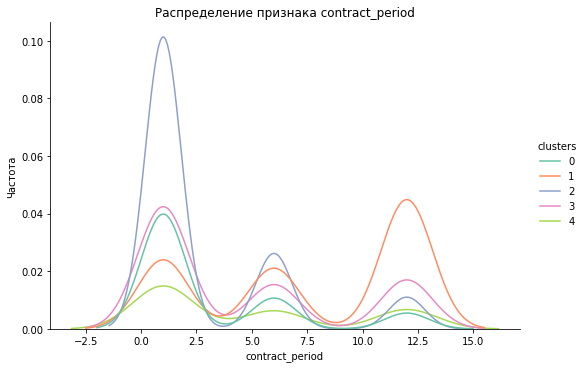

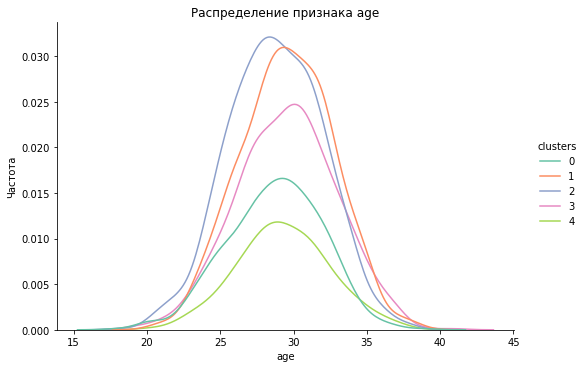

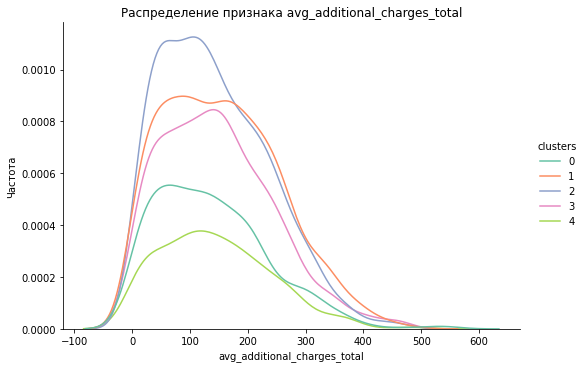

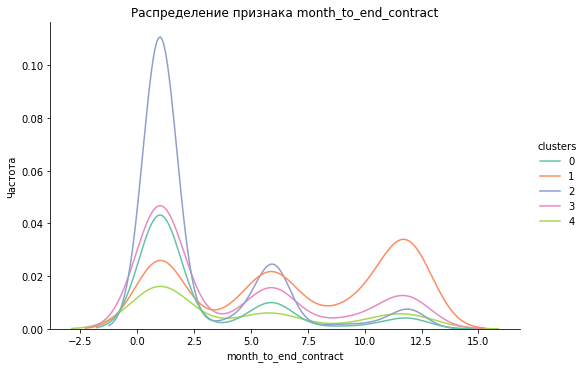

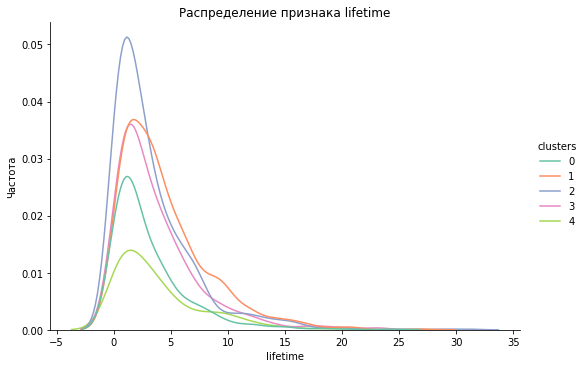

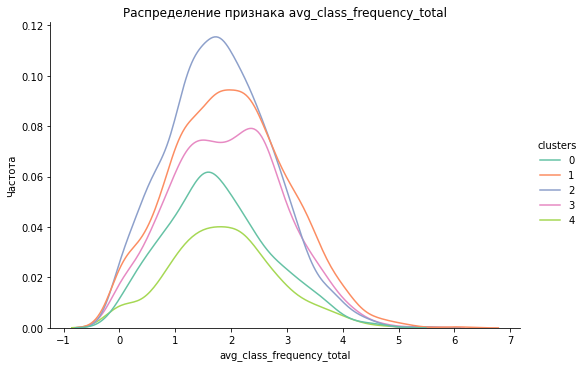

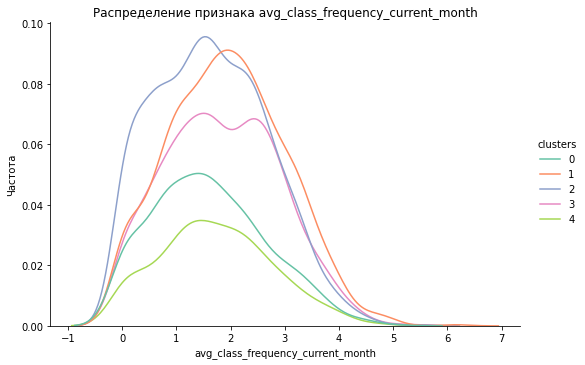

In [ ]:
# смотрим распределение для небинарных признаков
for column in df.columns[~df.isin([0,1,2,3,4]).all()]:
    sns.displot(data=df, x=column, hue='clusters', palette='Set2',
                kind='kde', height=5, aspect=1.5)
    plt.title(f'Распределение признака {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Частота')
    plt.show()

**Выводы:**   
*1) среднего пользователя 0 кластера можно охарактеризовать таким образом: это новый клиент, человек, живущий далеко от клуба, пришедший не по промо "пригласи друга", чаще с абонементом на 1 месяц, 50/50 пришедший по партнерской программе, не посещающий групповые занятия*    
*2) среднего пользователя 1 кластера можно охарактеризовать таким образом: это проверенный временем клиент, человек, живущий рядом, пришедший по промо "пригласи друга" или по партнерской программе с абонементом на 12 мес., 50/50 посещающий групповые занятия, в среднем больше тратящийся на доп. сервис, имеющий наименьшую вероятность оттока*   
*3) среднего пользователя 2 кластера можно охарактеризовать таким образом: это новый клиент, человек, пришедший "самоходом", живущий рядом, не посещающий групповые занятия, купивший абонемент на месяц, наиболее молодой, не тратящийся на доп.сервис, больше всех склонен к оттоку*   
*4) среднего пользователя 3 кластера можно охарактеризовать таким образом: это человек, пришедший "самоходом", живущий рядом, посещающий групповые занятия, не склонный к оттоку*   
*5) наиболее малочисленный кластр 4, люди, чаще приходящие самоходом, чем по акциям, с краткосрочным абонементом*

In [ ]:
df.groupby('clusters')['churn'].agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
clusters,,
0,561,0.399287
2,1132,0.381625
4,386,0.266839
3,871,0.200918
1,1050,0.120952


**Выводы:** *Наибольшие по количеству людей кластеры: 2, 1 и 3. Наиболее склонный к оттоку кластер 0, но он менее репрезентативен, из крупных кластеров наиболее склонны к оттоку люди из 2 кластера. Самые надежные в 1 и 3 кластере.*

# Общие выводы и рекомендации <a id='5'></a>

* Наиболее лояльный к фитнес-клубу кластер 1, покупающий годовые абонементы, пришедший с другом или по партнерской программе. С данным классом все хорошо   
* Склонны к оттоку класс 2 и 0, которые приходят "самоходом" на короткий абонемент и уходят. Мы видим, что на отток больше всего влияет возраст клиента - чем он моложе, тем более вероятен его отток, также влияет длительность абонемента. Можно рассмотреть возможность добавления каких-то привилегий при покупке более длинного абонемента, например, предложить бесплатные дополнительные групповые занятия при покупке абонемента на срок более месяца или скидку на дополнительные услуги фитнес-центра. Неплохо было бы также провести анкетирование клиентов с коротким абонементом на предмет удовлетворенности и пожеланиям к сервису.    
* Также можно продумать предложения для клиентов 3 класса, которые любят групповые занятия, достаточно лояльны, но склонны к покупке коротких абонементов. К ним можно подойти со стороны интереса к групповым и, например, провести какую-то акцию - при посещении N занятий, предлагается скидка на более длинный абонемент.   
* Мы видим, что также меньше отток у пришедших по партнерской программе и промо "приведи друга", возможно, следует продумать расширение данных программ.   
* Для прогноза на этих данных отличные результаты показывает как логистическая регрессия, так и модель случайных деверьев.
